# **Final Project**
Group 2

Benjamin Bearman, Carrima Hewitt, Franchesca Mieles, Ariel Pita, Daniel Rawana

ISM6644

Tala Mirzaei

Feb. 22, 2025

### Import Libraries

In [3]:
import pandas as pd
import numpy as np

### Read the CSV and create dataframe

In [5]:
df = pd.read_csv('Consumer Data Project.csv')
df.head()

,Service,Age,CustomerSince,Customer Gender,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction Score,Unnamed: 9,Unnamed: 10
0,fiber,29,6/23/2010 10:27,M,North,2,61.0,0.32,5.0,NaN,NaN
1,4G,74,6/23/2010 10:27,M,North,0,48.0,0.02,3.0,NaN,NaN
2,phone,34,6/23/2010 10:27,F,Central,0,34.0,0.02,4.0,NaN,NaN
3,phone,60,6/24/2010 10:27,M,North,5,70.0,0.23,5.0,NaN,NaN
4,landline,29,6/24/2010 10:27,M,Central,5,40.0,0.09,5.0,NaN,NaN




---


# Data Cleaning

### Remove empty columns

In [8]:
df = df.iloc[0:, 0:9]
df.head()

,Service,Age,CustomerSince,Customer Gender,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction Score
0,fiber,29,6/23/2010 10:27,M,North,2,61.0,0.32,5.0
1,4G,74,6/23/2010 10:27,M,North,0,48.0,0.02,3.0
2,phone,34,6/23/2010 10:27,F,Central,0,34.0,0.02,4.0
3,phone,60,6/24/2010 10:27,M,North,5,70.0,0.23,5.0
4,landline,29,6/24/2010 10:27,M,Central,5,40.0,0.09,5.0


### View dataframe properties

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Service               9993 non-null   object 
 1   Age                   9993 non-null   int64  
 2   CustomerSince         9993 non-null   object 
 3   Customer Gender       9993 non-null   object 
 4   Region                9993 non-null   object 
 5   SupportCallsLastYear  9993 non-null   int64  
 6   AverageBill           9990 non-null   float64
 7   ChurnIndicator        9993 non-null   float64
 8   Satisfaction Score    9991 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 702.8+ KB


In [11]:
#Viewing the Service column value counts
df['Service'].value_counts()

Service
4G          3343
phone       3290
fiber       1694
landline    1666
Name: count, dtype: int64

In [12]:
#Viewing the Customer Gender column value counts
df['Customer Gender'].value_counts()

Customer Gender
F    5075
M    4918
Name: count, dtype: int64

In [13]:
#Viewing the Region column value counts
df['Region'].value_counts()

Region
Central    4933
North      2590
South      2470
Name: count, dtype: int64

In [14]:
#Renaming columns to remove spaces or simplify titles
df.rename(columns={'Customer Gender':'Sex', 'Satisfaction Score':'Satisfaction'},

inplace=True)

df.head(100)

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction
0,fiber,29,6/23/2010 10:27,M,North,2,61.0,0.32,5.0
1,4G,74,6/23/2010 10:27,M,North,0,48.0,0.02,3.0
2,phone,34,6/23/2010 10:27,F,Central,0,34.0,0.02,4.0
3,phone,60,6/24/2010 10:27,M,North,5,70.0,0.23,5.0
4,landline,29,6/24/2010 10:27,M,Central,5,40.0,0.09,5.0
...,...,...,...,...,...,...,...,...,...
95,landline,32,7/13/2010 10:27,F,Central,1,54.0,0.01,8.0
96,4G,63,7/14/2010 10:27,M,North,10,45.0,0.25,3.0
97,4G,73,7/14/2010 10:27,F,South,5,58.0,0.11,4.0
98,4G,33,7/14/2010 10:27,F,Central,1,51.0,0.04,6.0


In [15]:
#Replacing any NaN values with the average of all non-NaN values
df['AverageBill'].fillna(df['AverageBill'].mean(),inplace=True)

df['AverageBill'].isna().sum()

C:\Users\Carrima\AppData\Local\Temp\ipykernel_11224\786528896.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AverageBill'].fillna(df['AverageBill'].mean(),inplace=True)


0

In [16]:
#Replacing any NaN values with the average of all non-NaN values
df['Satisfaction'].fillna(df['Satisfaction'].mean(),inplace=True)

df['Satisfaction'].isna().sum()

df.head(20)

C:\Users\Carrima\AppData\Local\Temp\ipykernel_11224\1965779553.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Satisfaction'].fillna(df['Satisfaction'].mean(),inplace=True)


,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction
0,fiber,29,6/23/2010 10:27,M,North,2,61.000000,0.32,5.000000
1,4G,74,6/23/2010 10:27,M,North,0,48.000000,0.02,3.000000
2,phone,34,6/23/2010 10:27,F,Central,0,34.000000,0.02,4.000000
3,phone,60,6/24/2010 10:27,M,North,5,70.000000,0.23,5.000000
4,landline,29,6/24/2010 10:27,M,Central,5,40.000000,0.09,5.000000
5,phone,38,6/24/2010 10:27,M,Central,0,71.505105,0.70,2.000000
6,phone,61,6/25/2010 10:27,F,North,0,98.000000,0.03,7.000000
7,fiber,76,6/25/2010 10:27,M,Central,0,105.000000,0.01,4.000000
8,phone,71,6/25/2010 10:27,M,Central,0,103.000000,0.80,2.000000
9,landline,61,6/25/2010 10:27,F,Central,0,85.000000,0.00,9.000000


In [17]:
#Dropping any duplicates
df.drop_duplicates()

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction
0,fiber,29,6/23/2010 10:27,M,North,2,61.0,0.32,5.0
1,4G,74,6/23/2010 10:27,M,North,0,48.0,0.02,3.0
2,phone,34,6/23/2010 10:27,F,Central,0,34.0,0.02,4.0
3,phone,60,6/24/2010 10:27,M,North,5,70.0,0.23,5.0
4,landline,29,6/24/2010 10:27,M,Central,5,40.0,0.09,5.0
...,...,...,...,...,...,...,...,...,...
9988,landline,72,12/13/2015 10:27,M,North,1,39.0,0.00,4.0
9989,4G,29,12/13/2015 10:27,F,Central,0,86.0,0.00,7.0
9990,phone,41,12/14/2015 10:27,M,Central,6,50.0,0.00,5.0
9991,4G,43,12/14/2015 10:27,F,Central,1,67.0,0.00,7.0


In [18]:
#Viewing the updated dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Service               9993 non-null   object 
 1   Age                   9993 non-null   int64  
 2   CustomerSince         9993 non-null   object 
 3   Sex                   9993 non-null   object 
 4   Region                9993 non-null   object 
 5   SupportCallsLastYear  9993 non-null   int64  
 6   AverageBill           9993 non-null   float64
 7   ChurnIndicator        9993 non-null   float64
 8   Satisfaction          9993 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 702.8+ KB


In [19]:
#Converting various Date formats into DataTime format
df["CustomerSince"] = pd.to_datetime(df["CustomerSince"], errors="coerce")

df.head(15)

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.000000,0.32,5.0
1,4G,74,2010-06-23 10:27:00,M,North,0,48.000000,0.02,3.0
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.000000,0.02,4.0
3,phone,60,2010-06-24 10:27:00,M,North,5,70.000000,0.23,5.0
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.000000,0.09,5.0
5,phone,38,2010-06-24 10:27:00,M,Central,0,71.505105,0.70,2.0
6,phone,61,2010-06-25 10:27:00,F,North,0,98.000000,0.03,7.0
7,fiber,76,2010-06-25 10:27:00,M,Central,0,105.000000,0.01,4.0
8,phone,71,2010-06-25 10:27:00,M,Central,0,103.000000,0.80,2.0
9,landline,61,2010-06-25 10:27:00,F,Central,0,85.000000,0.00,9.0


In [20]:
#Viewing the updated dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Service               9993 non-null   object        
 1   Age                   9993 non-null   int64         
 2   CustomerSince         9993 non-null   datetime64[ns]
 3   Sex                   9993 non-null   object        
 4   Region                9993 non-null   object        
 5   SupportCallsLastYear  9993 non-null   int64         
 6   AverageBill           9993 non-null   float64       
 7   ChurnIndicator        9993 non-null   float64       
 8   Satisfaction          9993 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 702.8+ KB


In [21]:
#Calculating the z score for Age
df['z_score_A'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()

threshold = 3

df['is_outlier_A'] = df['z_score_A'].apply(lambda x: abs(x) > threshold)

df.head()

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction,z_score_A,is_outlier_A
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.32,5.0,-1.117500,False
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,1.535261,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.822749,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.23,5.0,0.709957,False
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.09,5.0,-1.117500,False


In [22]:
#Viewing if there are any outliers in Age
df['is_outlier_A'].value_counts()

is_outlier_A
False    9993
Name: count, dtype: int64

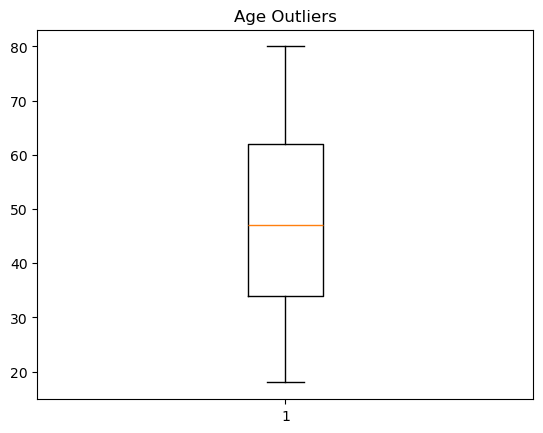

In [23]:
# Visualizing Age Outliers Using Box Plot

import matplotlib.pyplot as plt #this brings in the formula for box plot a form of data visualization

# Plot a boxplot to visualize the outliers
plt.boxplot(df['Age']) 
plt.title('Age Outliers')
plt.show() 

In [24]:
#Calculating the z score for Average Bill
df['z_score_AB'] = (df['AverageBill'] - df['AverageBill'].mean()) / df['AverageBill'].std()

threshold = 3

df['is_outlier_AB'] = df['z_score_AB'].apply(lambda x: abs(x) > threshold)

df.head()

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction,z_score_A,is_outlier_A,z_score_AB,is_outlier_AB
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.32,5.0,-1.117500,False,-0.442123,False
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,1.535261,False,-0.989247,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.822749,False,-1.578457,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.23,5.0,0.709957,False,-0.063345,False
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.09,5.0,-1.117500,False,-1.325938,False


In [25]:
df['is_outlier_AB'].value_counts()

is_outlier_AB
False    9993
Name: count, dtype: int64

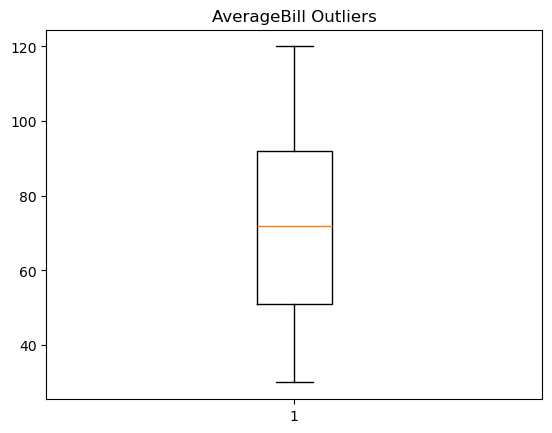

In [26]:
# Visualizing Outliers Using Box Plot

import matplotlib.pyplot as plt #this brings in the formula for box plot a form of data visualization

# Plot a boxplot to visualize the outliers
plt.boxplot(df['AverageBill']) 
plt.title('AverageBill Outliers')
plt.show() 

In [27]:
#Calculating the z score for ChurnIndicator
df['z_score_CI'] = (df['ChurnIndicator'] - df['ChurnIndicator'].mean()) / df['ChurnIndicator'].std()

threshold = 3

df['is_outlier_CI'] = df['z_score_CI'].apply(lambda x: abs(x) > threshold)

df.head()

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction,z_score_A,is_outlier_A,z_score_AB,is_outlier_AB,z_score_CI,is_outlier_CI
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.32,5.0,-1.117500,False,-0.442123,False,1.679604,False
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,1.535261,False,-0.989247,False,-0.271732,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.822749,False,-1.578457,False,-0.271732,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.23,5.0,0.709957,False,-0.063345,False,1.094203,False
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.09,5.0,-1.117500,False,-1.325938,False,0.183580,False


In [28]:
#Viewing if there are any outliers in ChurnIndicator
df['is_outlier_CI'].value_counts()

is_outlier_CI
False    9616
True      377
Name: count, dtype: int64

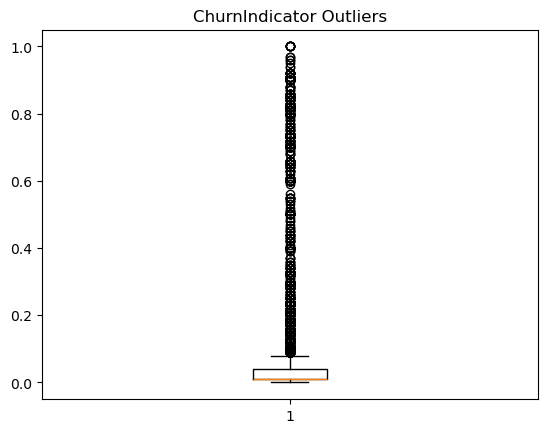

In [29]:
# Visualizing ChurnIndicator Outliers Using Box Plot
import matplotlib.pyplot as plt #this brings in the formula for box plot a form of data visualization

# Plot a boxplot to visualize the outliers
plt.boxplot(df['ChurnIndicator']) 
plt.title('ChurnIndicator Outliers')
plt.show() 

In [30]:
# Handling Outliers in ChurnIndicator by Replacing Them with the Median.

median_value = df['ChurnIndicator'].median()

df['ChurnIndicator'] = np.where(df['is_outlier_CI'], median_value, df['ChurnIndicator']) 

#Display the dataframe handling Outliers by Replacing Them with the Median
df

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction,z_score_A,is_outlier_A,z_score_AB,is_outlier_AB,z_score_CI,is_outlier_CI
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.32,5.0,-1.117500,False,-0.442123,False,1.679604,False
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,1.535261,False,-0.989247,False,-0.271732,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.822749,False,-1.578457,False,-0.271732,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.23,5.0,0.709957,False,-0.063345,False,1.094203,False
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.09,5.0,-1.117500,False,-1.325938,False,0.183580,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,landline,72,2015-12-13 10:27:00,M,North,1,39.0,0.00,4.0,1.417360,False,-1.368025,False,-0.401821,False
9989,4G,29,2015-12-13 10:27:00,F,Central,0,86.0,0.00,7.0,-1.117500,False,0.610039,False,-0.401821,False
9990,phone,41,2015-12-14 10:27:00,M,Central,6,50.0,0.00,5.0,-0.410097,False,-0.905074,False,-0.401821,False
9991,4G,43,2015-12-14 10:27:00,F,Central,1,67.0,0.00,7.0,-0.292197,False,-0.189604,False,-0.401821,False


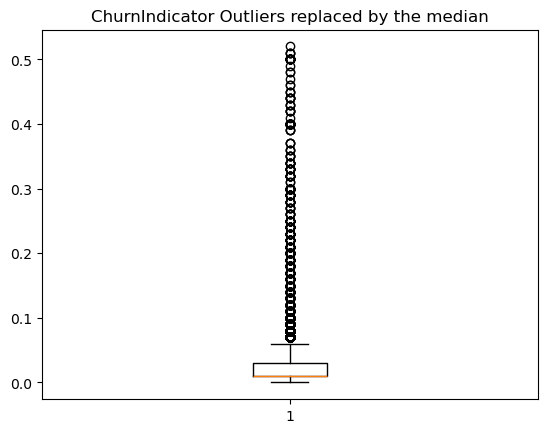

In [31]:
# Visualizing Outliers Using Box Plot

import matplotlib.pyplot as plt #this brings in the formula for box plot a form of data visualization

# Plot a boxplot to visualize the outliers replaced by the Median
plt.boxplot(df['ChurnIndicator']) 
plt.title('ChurnIndicator Outliers replaced by the median')
plt.show() 

In [32]:
#Calculating the z score for Satisfaction
df['z_score_S'] = (df['Satisfaction'] - df['Satisfaction'].mean()) / df['Satisfaction'].std()

threshold = 3

df['is_outlier_S'] = df['z_score_S'].apply(lambda x: abs(x) > threshold)

df.head()

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction,z_score_A,is_outlier_A,z_score_AB,is_outlier_AB,z_score_CI,is_outlier_CI,z_score_S,is_outlier_S
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.32,5.0,-1.117500,False,-0.442123,False,1.679604,False,-0.359588,False
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,1.535261,False,-0.989247,False,-0.271732,False,-1.334658,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.822749,False,-1.578457,False,-0.271732,False,-0.847123,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.23,5.0,0.709957,False,-0.063345,False,1.094203,False,-0.359588,False
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.09,5.0,-1.117500,False,-1.325938,False,0.183580,False,-0.359588,False


In [33]:
#viewing if there are any outliers in Satisfaction
df['is_outlier_S'].value_counts()

is_outlier_S
False    9993
Name: count, dtype: int64

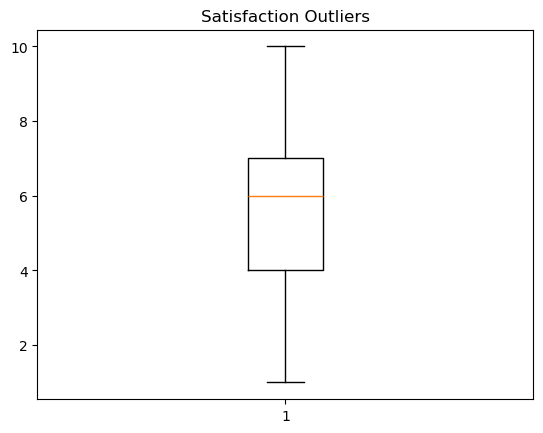

In [34]:
# Visualizing Satisfaction Outliers Using Box Plot

import matplotlib.pyplot as plt #this brings in the formula for box plot a form of data visualization

# Plot a boxplot to visualize the outliers
plt.boxplot(df['Satisfaction']) 
plt.title('Satisfaction Outliers')
plt.show() 

In [35]:
#Calculating the z score for Satisfaction
df['z_score_SCLY'] = (df['SupportCallsLastYear'] - df['SupportCallsLastYear'].mean()) / df['SupportCallsLastYear'].std()

threshold = 3

df['is_outlier_SCLY'] = df['z_score_SCLY'].apply(lambda x: abs(x) > threshold)

df.head()

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction,z_score_A,is_outlier_A,z_score_AB,is_outlier_AB,z_score_CI,is_outlier_CI,z_score_S,is_outlier_S,z_score_SCLY,is_outlier_SCLY
0,fiber,29,2010-06-23 10:27:00,M,North,2,61.0,0.32,5.0,-1.117500,False,-0.442123,False,1.679604,False,-0.359588,False,0.036255,False
1,4G,74,2010-06-23 10:27:00,M,North,0,48.0,0.02,3.0,1.535261,False,-0.989247,False,-0.271732,False,-1.334658,False,-0.755650,False
2,phone,34,2010-06-23 10:27:00,F,Central,0,34.0,0.02,4.0,-0.822749,False,-1.578457,False,-0.271732,False,-0.847123,False,-0.755650,False
3,phone,60,2010-06-24 10:27:00,M,North,5,70.0,0.23,5.0,0.709957,False,-0.063345,False,1.094203,False,-0.359588,False,1.224113,False
4,landline,29,2010-06-24 10:27:00,M,Central,5,40.0,0.09,5.0,-1.117500,False,-1.325938,False,0.183580,False,-0.359588,False,1.224113,False


In [36]:
#viewing if there are any outliers in SupportCallsLastYear
df['is_outlier_SCLY'].value_counts()

is_outlier_SCLY
False    9886
True      107
Name: count, dtype: int64

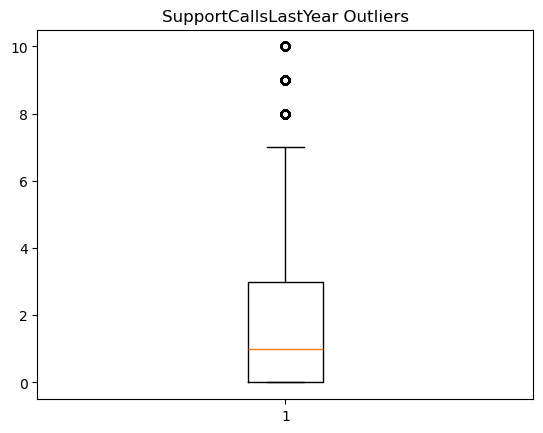

In [37]:
# Visualizing Outliers Using Box Plot

import matplotlib.pyplot as plt #this brings in the formula for box plot a form of data visualization

# Plot a boxplot to visualize the outliers
plt.boxplot(df['SupportCallsLastYear']) 
plt.title('SupportCallsLastYear Outliers')
plt.show() 

In [38]:
# Handling SupportCallsLastYear Outliers by Replacing Them with the Median.

median_value = df['SupportCallsLastYear'].median()

df['SupportCallsLastYear'] = np.where(df['is_outlier_SCLY'], median_value, df['SupportCallsLastYear']) 

#Display the dataframe handling Outliers by Replacing Them with the Median
df

,Service,Age,CustomerSince,Sex,Region,SupportCallsLastYear,AverageBill,ChurnIndicator,Satisfaction,z_score_A,is_outlier_A,z_score_AB,is_outlier_AB,z_score_CI,is_outlier_CI,z_score_S,is_outlier_S,z_score_SCLY,is_outlier_SCLY
0,fiber,29,2010-06-23 10:27:00,M,North,2.0,61.0,0.32,5.0,-1.117500,False,-0.442123,False,1.679604,False,-0.359588,False,0.036255,False
1,4G,74,2010-06-23 10:27:00,M,North,0.0,48.0,0.02,3.0,1.535261,False,-0.989247,False,-0.271732,False,-1.334658,False,-0.755650,False
2,phone,34,2010-06-23 10:27:00,F,Central,0.0,34.0,0.02,4.0,-0.822749,False,-1.578457,False,-0.271732,False,-0.847123,False,-0.755650,False
3,phone,60,2010-06-24 10:27:00,M,North,5.0,70.0,0.23,5.0,0.709957,False,-0.063345,False,1.094203,False,-0.359588,False,1.224113,False
4,landline,29,2010-06-24 10:27:00,M,Central,5.0,40.0,0.09,5.0,-1.117500,False,-1.325938,False,0.183580,False,-0.359588,False,1.224113,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,landline,72,2015-12-13 10:27:00,M,North,1.0,39.0,0.00,4.0,1.417360,False,-1.368025,False,-0.401821,False,-0.847123,False,-0.359698,False
9989,4G,29,2015-12-13 10:27:00,F,Central,0.0,86.0,0.00,7.0,-1.117500,False,0.610039,False,-0.401821,False,0.615482,False,-0.755650,False
9990,phone,41,2015-12-14 10:27:00,M,Central,6.0,50.0,0.00,5.0,-0.410097,False,-0.905074,False,-0.401821,False,-0.359588,False,1.620066,False
9991,4G,43,2015-12-14 10:27:00,F,Central,1.0,67.0,0.00,7.0,-0.292197,False,-0.189604,False,-0.401821,False,0.615482,False,-0.359698,False


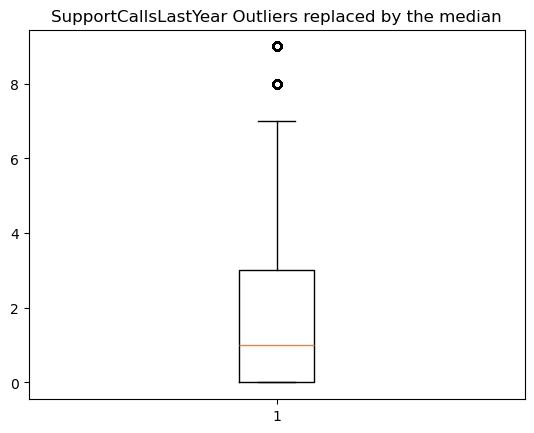

In [39]:
# Visualizing Outliers Using Box Plot

import matplotlib.pyplot as plt #this brings in the formula for box plot a form of data visualization

# Plot a boxplot to visualize the outliers replaced by the Median
plt.boxplot(df['SupportCallsLastYear']) 
plt.title('SupportCallsLastYear Outliers replaced by the median')
plt.show() 

In [40]:
# Transform the data into a suitable format for analysis.
df
df_encoded = pd.get_dummies(df, columns=['Service', 'Sex', 'Region'])
df_encoded
df = df_encoded

# Exploratory Data Analysis (EDA)

In [42]:
#Display information about dataset:
#print(df.head)

#Describe Shape
print("SHAPE:")
print(df.shape)

#Displays a summary of statistics 
print("\nSTATISTICS:")
print(df.describe())

SHAPE:
(9993, 25)

STATISTICS:
               Age                  CustomerSince  SupportCallsLastYear  \
count  9993.000000                           9993           9993.000000   
mean     47.956670  2013-03-24 04:42:53.587511040              1.812068   
min      18.000000            2010-06-23 10:27:00              0.000000   
25%      34.000000            2011-11-03 11:27:00              0.000000   
50%      47.000000            2013-03-31 10:27:00              1.000000   
75%      62.000000            2014-08-08 10:27:00              3.000000   
max      80.000000            2015-12-14 10:27:00              9.000000   
std      16.963456                            NaN              2.382614   

       AverageBill  ChurnIndicator  Satisfaction     z_score_A    z_score_AB  \
count  9993.000000     9993.000000   9993.000000  9.993000e+03  9.993000e+03   
mean     71.505105        0.033259      5.737564  1.162551e-16  1.350977e-16   
min      30.000000        0.000000      1.000000 -1.7

In [43]:
print("ABOUT THE DATASET")
print(df.info())

print("\nCOLUMNS:")
print(df.columns.tolist())

ABOUT THE DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Age                   9993 non-null   int64         
 1   CustomerSince         9993 non-null   datetime64[ns]
 2   SupportCallsLastYear  9993 non-null   float64       
 3   AverageBill           9993 non-null   float64       
 4   ChurnIndicator        9993 non-null   float64       
 5   Satisfaction          9993 non-null   float64       
 6   z_score_A             9993 non-null   float64       
 7   is_outlier_A          9993 non-null   bool          
 8   z_score_AB            9993 non-null   float64       
 9   is_outlier_AB         9993 non-null   bool          
 10  z_score_CI            9993 non-null   float64       
 11  is_outlier_CI         9993 non-null   bool          
 12  z_score_S             9993 non-null   float64       
 13  

# Data Visualization

## Import Data Visualization Libraries

In [46]:
#Import Matplotlib
import matplotlib.pyplot as plt

#Import Seaborn
import seaborn as sns

## Customer Demographics

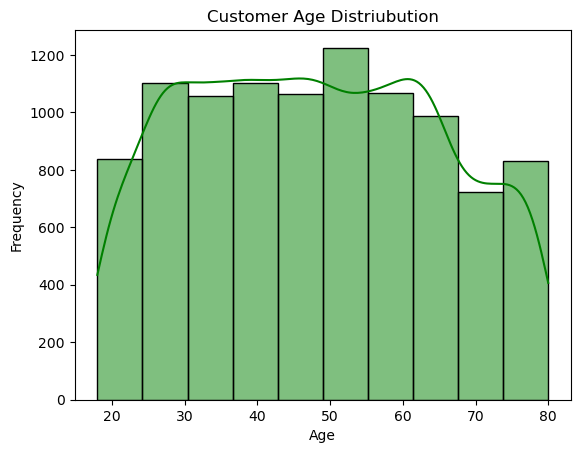

In [48]:
# Age Distribution using Seaborn

# Create a histogram
sns.histplot(df['Age'], bins=10, kde=True, color="green")

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Customer Age Distriubution')

plt.show()

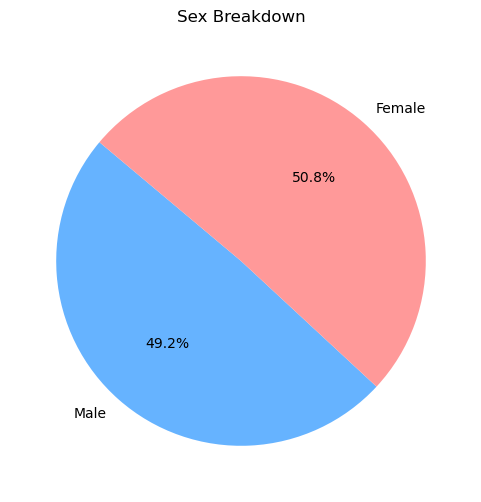

In [49]:
# Sex Breakdown using Matplotlib
# Count occurrences of each sex
males = df['Sex_M'].sum()
females = df['Sex_F'].sum()

# Create a pie chart
plt.figure(figsize=(6,6)) # Constrain pie chart dimensions to 6inches in height and width
# Uses the sexes as labels, display as percent with one decimal, rotate the chart 140 deg
plt.pie([males, females], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Sex Breakdown')
plt.show()

## Regional Differences

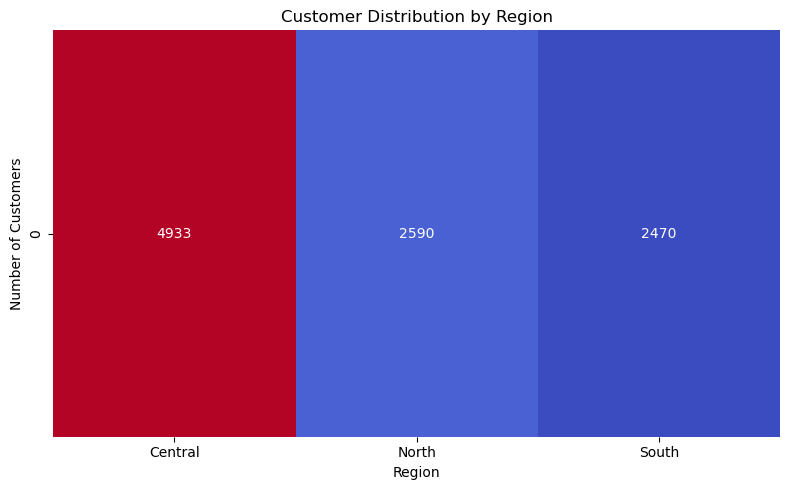

In [51]:
# Customer Distribution by Region using Seaborn
#Count customers per region
central = df['Region_Central'].sum()
north = df['Region_North'].sum()  
south = df['Region_South'].sum()

# Convert the counts to a DataFrame
regions_df = pd.DataFrame([[central, north, south]], columns=['Central', 'North', 'South'])

#Create a heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(regions_df, annot=True, cmap='coolwarm', cbar=False, fmt='d')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.title('Customer Distribution by Region')
plt.tight_layout()

plt.show()

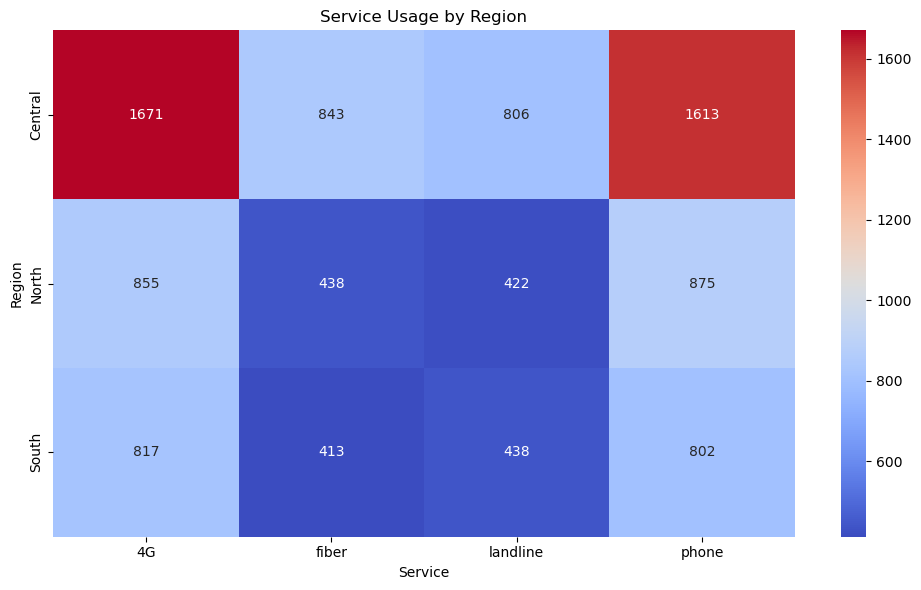

In [52]:
# Service usage by region using Seaborn

# Service usage by region
# Recombine dummy columns to make process smoother
merged_df = pd.DataFrame()
merged_df['Region'] = df.filter(regex='Region').idxmax(axis=1).str.replace('Region_', '')
merged_df['Service'] = df.filter(regex='Service').idxmax(axis=1).str.replace('Service_', '')

#Count occurences of each service by region and convert to grouped dataframe
service_by_region = merged_df.groupby(['Region', 'Service']).size().unstack(fill_value=0)

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(service_by_region, annot=True, cmap='coolwarm', cbar=True, fmt='d')

# Add labels and title
plt.title('Service Usage by Region')
plt.xlabel('Service')
plt.ylabel('Region')
plt.tight_layout()

plt.show()

## Customer Behavior

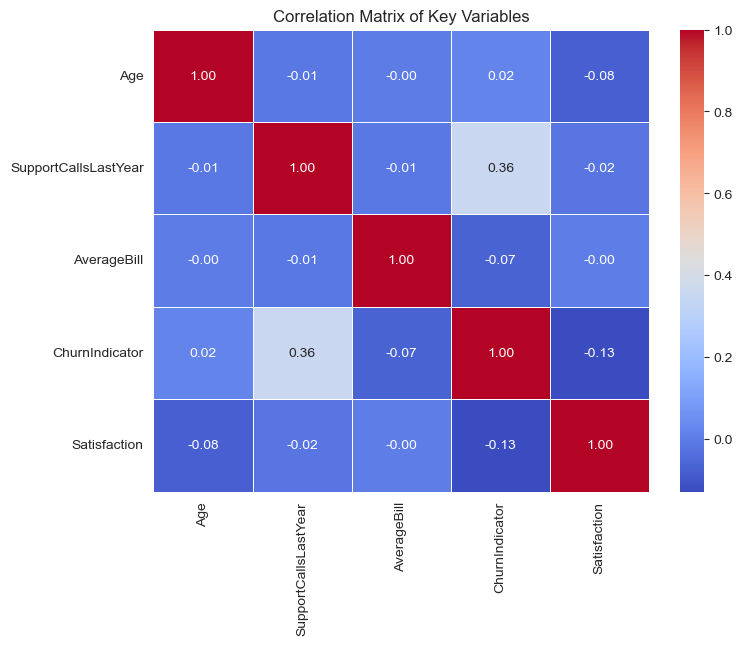

In [103]:
# Compute correlation matrix (for numerical variables only)
key_vars = pd.DataFrame({
    'Age': df['Age'],
    'SupportCallsLastYear': df['SupportCallsLastYear'],
    'AverageBill': df['AverageBill'],
    'ChurnIndicator': df['ChurnIndicator'],
    'Satisfaction': df['Satisfactiom
})
correlation_matrix = df[

# Generate a heatmap to visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Variables")
plt.show()

C:\Users\Carrima\AppData\Local\Temp\ipykernel_11224\3504547101.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  serv.set_xticklabels(['4G', 'Fiber', 'Landline', 'Phone'])


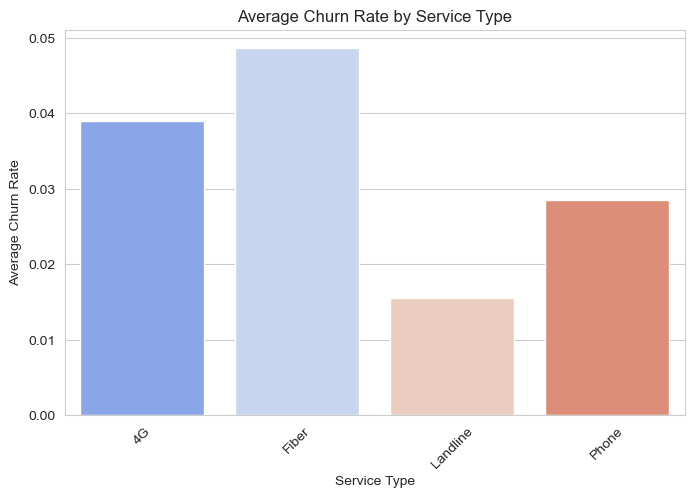

In [169]:
# Identify dummy columns for service
service_columns = [col for col in df.columns if 'Service_' in col]

# Calculate average churn rate for each service type (dummy variable)
churn_by_service = df[service_columns].T.dot(df['ChurnIndicator']) / df[service_columns].sum()

# Plot: Churn by Service Type
plt.figure(figsize=(8, 5))
x = churn_by_service.index
serv = sns.barplot(x=x, y=churn_by_service.values, hue=x, palette="coolwarm")
serv.set_xticklabels(['4G', 'Fiber', 'Landline', 'Phone'])
plt.title('Average Churn Rate by Service Type')
plt.xlabel('Service Type')
plt.ylabel('Average Churn Rate')
plt.xticks(rotation=45)
plt.show()

C:\Users\Carrima\AppData\Local\Temp\ipykernel_11224\3468295148.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  serv.set_xticklabels(['Central', 'North', 'South'])


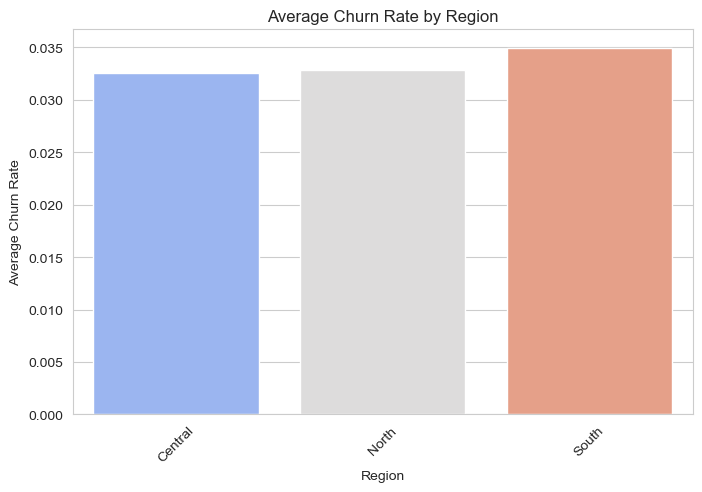

In [163]:
# Identify dummy columns for region
service_columns = [col for col in df.columns if 'Region_' in col]

# Calculate average churn rate for each service type (dummy variable)
churn_by_service = df[service_columns].T.dot(df['ChurnIndicator']) / df[service_columns].sum()

# Plot: Churn by Service Type
plt.figure(figsize=(8, 5))
x = churn_by_service.index
serv = sns.barplot(x=x, y=churn_by_service.values, hue=x, palette="coolwarm")
serv.set_xticklabels(['Central', 'North', 'South'])
plt.title('Average Churn Rate by Region')
plt.xlabel('Region')
plt.ylabel('Average Churn Rate')
plt.xticks(rotation=45)
plt.show()